In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
my_df=pd.read_csv('medical.csv')

In [14]:
my_df.head()

,Feature1,Feature2,Feature3,Label
0,104967.141530,527987.108732,966241.086251,0
1,98617.356988,518492.673658,992774.066464,0
2,106476.885381,501192.607398,960379.003950,0
3,115230.298564,487061.264446,984601.923518,0
4,97658.466253,513964.466272,905319.266652,0


In [33]:
my_df.shape

(1020, 4)

In [15]:
my_df['Label'].value_counts()
#shows 1000 normal 20 outliers 

Label
0    1000
1      20
Name: count, dtype: int64

In [16]:
## seperate label from dataset

In [19]:
df=my_df.iloc[:,0:3]

In [20]:
df.head()

,Feature1,Feature2,Feature3
0,104967.141530,527987.108732,966241.086251
1,98617.356988,518492.673658,992774.066464
2,106476.885381,501192.607398,960379.003950
3,115230.298564,487061.264446,984601.923518
4,97658.466253,513964.466272,905319.266652


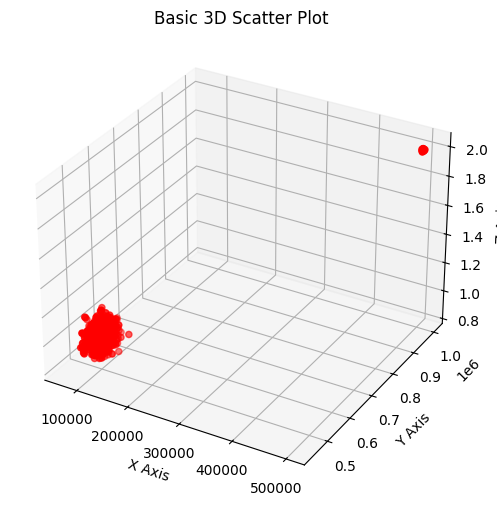

In [24]:
##3d scatter plot using matplotlib
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df['Feature1'], df['Feature2'], df['Feature3'], color='red', marker='o')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Basic 3D Scatter Plot')
plt.show()

In [25]:
from sklearn.ensemble import IsolationForest

In [52]:
# 2. Create Isolation Forest (minimal setup)
iso = IsolationForest(
    contamination=0.02,  # Expect ~2% anomalies
    random_state=42
)

In [64]:
iso.fit(df)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [65]:
predictions=iso.predict(df)

In [66]:
predictions##1 for normal data points and -1 for outliers.

array([ 1,  1,  1, ..., -1, -1, -1])

In [67]:
##exporting index of outliers
index=np.where(predictions<0)


In [68]:
index

(array([ 880, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
        1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019]),)

In [69]:
x=df.values

In [71]:
x

array([[ 104967.14153011,  527987.10873172,  966241.08625128],
       [  98617.35698829,  518492.67365826,  992774.06646422],
       [ 106476.88538101,  501192.6073984 ,  960379.00395   ],
       ...,
       [ 497167.84440189, 1000340.92754199, 2001021.94515801],
       [ 499548.84114159,  998074.53486943, 1993989.25236962],
       [ 500551.74079991,  999586.77744061, 1998021.59644122]])

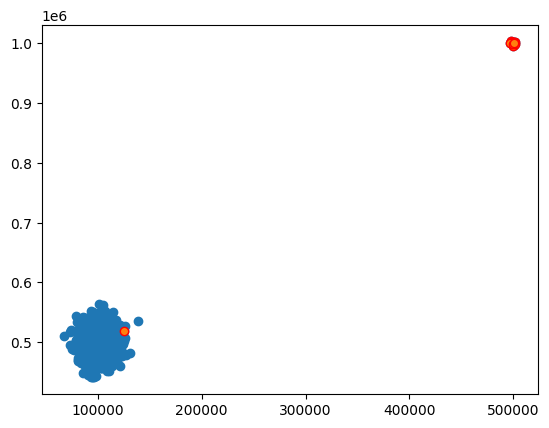

In [72]:
plt.scatter(df['Feature1'],df['Feature2'])
plt.scatter(x[index,0],x[index,1],edgecolor='r')
plt.show()

In [ ]:
##read one are outliers or anamolies..